In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#df = pd.read_csv("Categorical.csv")

#df.head(15)

In [2]:
#df = df.loc[:, ['Longitude', 'Latitude']]

#df

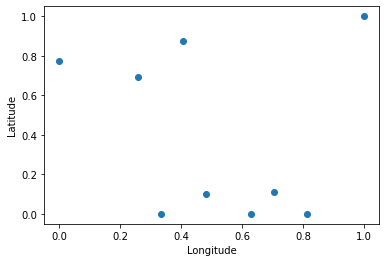

array([[0.33333333, 0.        ],
       [0.40740741, 0.87323944],
       [1.        , 1.        ],
       [0.62962963, 0.        ],
       [0.25925926, 0.69014085],
       [0.81481481, 0.        ],
       [0.48148148, 0.09859155],
       [0.7037037 , 0.11267606],
       [0.        , 0.77464789]])

In [3]:
X_norm = np.array([[10,125],[12,187], [28,196], [18,125], [8,174], [23,125], [14,132],
                [20,133], [1,180]])

from sklearn.preprocessing import minmax_scale

column_1 = minmax_scale(X_norm[:,0], feature_range=(0,1))#minmax_scale(sample[:,0], feature_range=(0,1)) #first column you don't want to scale
column_2 = minmax_scale(X_norm[:,1], feature_range=(0,1)) #second column you want to scale
X_norm = np.stack((column_1, column_2), axis=1) #stack both columns to get a 2d array


plt.scatter(X_norm[:,0], X_norm[:,1])
#plt.xlim(-180,180)
#plt.ylim(-90, 90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
X_norm

In [4]:
df = pd.DataFrame(X_norm, columns = ['Column_A','Column_B'])
df

,Column_A,Column_B
0,0.333333,0.000000
1,0.407407,0.873239
2,1.000000,1.000000
3,0.629630,0.000000
4,0.259259,0.690141
5,0.814815,0.000000
6,0.481481,0.098592
7,0.703704,0.112676
8,0.000000,0.774648


In [5]:
def calculate_cost(X_norm, centroids, cluster):
  sum = 0
  for i, val in enumerate(X_norm):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [6]:
def kmeans(X_norm, k):
  diff = 1
  cluster = np.zeros(X_norm.shape[0])
  centroids = df.sample(n=k).values
  while diff:
     # for each observation
     for i, row in enumerate(X_norm):
         mn_dist = float('inf')
        # dist of the point from all centroids
         for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster

In [7]:
k = 2
centroids, cluster = kmeans(X_norm, k)

NameError: name 'X' is not defined

In [ ]:
centroids

In [ ]:
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']

for l in range(k):
    plt.scatter(X_norm[l+1][:,0], X_norm[l+1][:, 1],s=10,c=color[l],label=labels[l])
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])

plt.scatter(X_norm[:,0], X_norm[:, 1],s=10,c='black',label='Centroids')
plt.scatter(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.scatter(centroids[:,0], centroids[:, 1],s=100,c='yellow',label='centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
df['cluster']= cluster
df.head()

In [ ]:
centroids

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.Longitude,df1['Latitude'],color='red',label='cluster 01')
plt.scatter(df2.Longitude,df2['Latitude'],color='black',label='cluster 02')
plt.scatter(df3.Longitude,df3['Latitude'],color='blue',label='cluster 03')
plt.scatter(df4.Longitude,df4['Latitude'],color='purple',label='cluster 04')
plt.scatter(centroids[:,0],centroids[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()